# Automates cellulaires: le jeu de la vie

Le « jeu de la vie » est un automate cellulaire inventé par John Horton Conway en 1970. C’est un système dynamique qui représente l’évolution de cellules disposées sur une grille.

À chaque étape, chaque cellule est soit vivante soit morte, et l’évolution de chaque cellule est entièrement déterminée par l’état de ses huit voisines, selon les 3 règles suivantes (cf. Figure 1):
* R1 : Si une cellule est morte et qu’elle possède exactement 3 voisines vivantes, elle devient vivante.
* R2 : Si une cellule est vivante et qu’elle possède strictement moins de 2 voisines vivantes, elle devient morte.
* R3 : Si une cellule est vivante et qu’elle possède strictement plus de 3 voisines vivantes, elle devient morte.
* Dans tous les autres cas, l’état (vivant ou mort) de la cellule ne change pas.

<img src = "figures/fig1.png" width = "400">

Nous allons implémenter le jeu de la vie dans un tableau à 3 dimensions (array). Les cellules vivantes et mortes sont représentées par des 1 et des 0, respectivement. Les « coupes » successives du tableau (3ème dimension) correspondent aux configurations successives du système dynamique au cours du temps (cf. Figure 2). 

<img src="figures/fig2.png" width = "300">

* [Partie 1](#1)
* [Partie 2](#2)

### Partie 1
<a id='1'></a>

In [1]:
# librairies numpy et matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
taille = 150 # grid size
temps = 400  # simulatiton's duration

In [12]:
# On inittialise une matrice de départ 150 * 150 avec des 0
X_0 = np.zeros(shape = (taille, taille))
print(X_0)
print(X_0.ndim)
print(X_0.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
2
(150, 150)


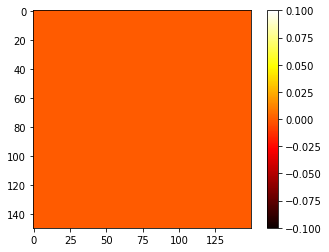

In [13]:
# on représente la matrice graphiquement
plt.imshow(X_0, cmap = plt.cm.hot) # 
plt.colorbar()
# plt.show() # not necessary in interactive mode (like jupyter)

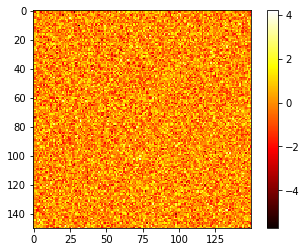

In [14]:
# on crée une matrice dont les éléments sont tirés
# selon une loi normale centrée réduite
X_0 = np.random.normal(size = (taille, taille))
# graphe
plt.imshow(X_0, cmap = plt.cm.hot)
plt.colorbar()

[[0 1 1 ... 0 0 0]
 [0 0 0 ... 1 0 1]
 [0 1 1 ... 0 1 1]
 ...
 [0 1 1 ... 0 1 1]
 [1 0 0 ... 0 1 1]
 [0 1 0 ... 0 1 1]]


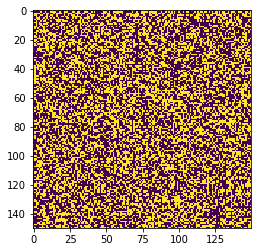

In [411]:
# Dans notre cas, on aimerait crée une matrice avec 40%/60% de 1/0.
X_0 = np.random.binomial(1, 0.40, size = (taille, taille))
print(X_0)
# graphe
plt.imshow(X_0)

In [412]:
# La simulation de notre jeu de la vie sera stockée dans un tableau 3D.
# Chaque couvhe représente une configuration.
# La trtoisième dimension représente le temps.

# on initialise un tableau 3D de dimensions 'taille x taille x temps' rempli avec des 0
simul = np.zeros(shape = (taille, taille, temps))

In [413]:
# on définit la fonction 'voisins' qui retourne les 8 voisins d'une celllule donnée
def voisins(X, i, j):
    "retourne les 8 voisins de la cellule X[i,j]"
    return np.array([X[i-1,j-1], 
                     X[i-1,j], 
                     X[i-1,j+1],
                     X[i,j-1],
                     X[i,j+1],  
                     X[i+1,j-1],
                     X[i+1,j],
                     X[i+1,j+1]
                    ])

In [414]:
v = voisins(X_0, 23, 62)
print(v)
print(v.ndim)
print(v.shape)
print(len(v))

[1 1 0 1 1 0 1 1]
1
(8,)
8


[1. 2. 3. 4. 5. 6. 7. 8.] [1 1 0 1 1 0 1 1]
1 (8,)
1 (8,)


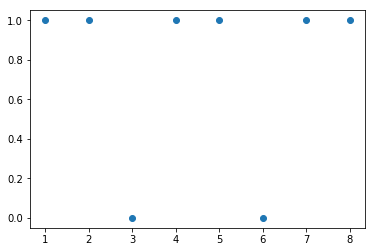

In [415]:
# on représente graphiquement les 8 voisins
x = np.linspace(1, 8, 8) # de 1 à 8 par pas de 1
y = v
print(x, y)
print(x.ndim, x.shape)
print(y.ndim, y.shape)
plt.plot(x, y, 'o') # line plot
# plt.show()

In [416]:
# Apparté: mdifiable and non-modifiable copies

# 1. modifiable copies
np.random.seed(2) # set the random seed, to reproduce results
X = np.random.rand(5, 5)
print(X)
Y = X # define Y, a MODIFIABLE copy of X
print(Y == X) # equality test
X[2,3] = 0 # set element (2,3) of X to 0
print(X)
print(Y == X) # equality test
# We see that the modification of X is automatically repercuted on Y !!!

[[0.4359949  0.02592623 0.54966248 0.43532239 0.4203678 ]
 [0.33033482 0.20464863 0.61927097 0.29965467 0.26682728]
 [0.62113383 0.52914209 0.13457995 0.51357812 0.18443987]
 [0.78533515 0.85397529 0.49423684 0.84656149 0.07964548]
 [0.50524609 0.0652865  0.42812233 0.09653092 0.12715997]]
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
[[0.4359949  0.02592623 0.54966248 0.43532239 0.4203678 ]
 [0.33033482 0.20464863 0.61927097 0.29965467 0.26682728]
 [0.62113383 0.52914209 0.13457995 0.         0.18443987]
 [0.78533515 0.85397529 0.49423684 0.84656149 0.07964548]
 [0.50524609 0.0652865  0.42812233 0.09653092 0.12715997]]
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


In [417]:
# 2. non-modifiable copies
np.random.seed(2) # set the random seed, to reproduce results
X = np.random.rand(5, 5)
print(X)
Y = np.copy(X) # define Y, a NON-MODIFIABLE copy of X
print(Y == X) # equality test
X[2,3] = 0 # set element (2,3) of X to 0
print(X)
print(Y == X) # equality test
# We see that the modification of X is automatically repercuted on Y !!!

[[0.4359949  0.02592623 0.54966248 0.43532239 0.4203678 ]
 [0.33033482 0.20464863 0.61927097 0.29965467 0.26682728]
 [0.62113383 0.52914209 0.13457995 0.51357812 0.18443987]
 [0.78533515 0.85397529 0.49423684 0.84656149 0.07964548]
 [0.50524609 0.0652865  0.42812233 0.09653092 0.12715997]]
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
[[0.4359949  0.02592623 0.54966248 0.43532239 0.4203678 ]
 [0.33033482 0.20464863 0.61927097 0.29965467 0.26682728]
 [0.62113383 0.52914209 0.13457995 0.         0.18443987]
 [0.78533515 0.85397529 0.49423684 0.84656149 0.07964548]
 [0.50524609 0.0652865  0.42812233 0.09653092 0.12715997]]
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True False  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


In [315]:
# On crée une fonction de mise à jour qui prend en paramètre 
# une matrice X et retourne la matrice X2 obtenue par 
# l’application des 3 règles ci-dessus aux éléments de X.
# On evite les bords de la matrice qui pose problème,
# car ils n'ont pas de. voisins
def maj1(X):
    X2 = np.copy(X) # non-modifiable copy of X
    for i in range(1, taille-1):
        for j in range(1, taille-1):
            if X[i,j] == 0 and np.sum(voisins(X, i, j)) == 3: # rule 1
                X2[i,j] = 1
            elif X[i,j] == 1 and np.sum(voisins(X, i, j)) < 2: # rule 2
                X2[i,j] = 0
            elif X[i,j] == 1 and sum(voisins(X, i, j)) > 3: # rule 3
                X2[i,j] = 0
    return(X2)

In [316]:
maj1(X_0)

array([[1, 1, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 1, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [317]:
# On remplitt le tableau 'simul' de telle sorte que:
# 1. sa première couche soit égale à la matrice X_0
# 2. pour tout indice t allant de 2 à temps-1, la couche d’indice t+1
#    corresponde à la mise à jour (donnée par la fonction du point 6)
#    de la couche d’indice t
simul[:, :, 0] = X_0 # première couche
for t in range(1, temps):
    simul[:, :, t] = maj1(simul[:, :, t-1])

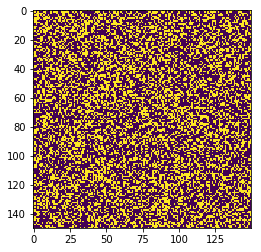

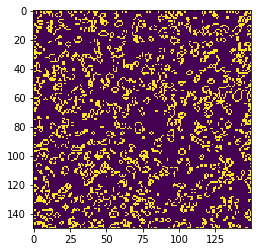

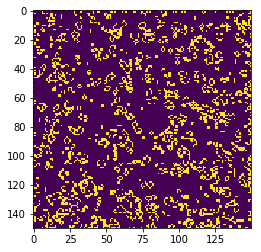

In [318]:
# la simulation est représentée par les couches succesives tu tableau
plt.imshow(simul[:, :, 0])  # temps 0
plt.show()
plt.imshow(simul[:, :, 15])  # temps 15
plt.show()
plt.imshow(simul[:, :, 30])  # temps 30
plt.show()

<a id='2'></a>
### Partie 2

In [418]:
# Autre version qui utilise la technique de 'vectorisation' ou 'BROADCASTING'
# et qui est beaucoup plut rapide...
# La VECTORISATION (ou BROADCASTING) consiste à appliquer des fonctions
# à touls les éléments d'un tableau de manière parallèle;
# le but est d'EVITER AU MAXIMUM LES BOUCLES FOR!

In [419]:
# Pour faire la somme des voisins d'une matrice, on utilise une
# fonction de convolution bi-dimentionnelle de la librairie scipy
from scipy.signal import convolve2d

# exemple
X = np.random.binomial(1, 0.4, size = (5, 5))
print(X)
X2 = convolve2d(X, np.ones((3,3), dtype = int), "same") - X
print(X2)

[[0 0 0 0 0]
 [0 0 1 0 0]
 [0 1 0 0 1]
 [1 0 1 0 0]
 [0 0 1 0 1]]
[[0 1 1 1 0]
 [1 2 1 2 1]
 [2 3 3 3 0]
 [1 4 2 4 2]
 [1 3 1 3 0]]


In [420]:
# on définit la fonction 'maj2' qui est VECTORISEE (utilise le 'BROADCASTING')
# il n'y a plus de boucles For!!!
# on traite les effets de bord également...

# Pour faire la somme des voisins d'une matrice, on utilise une
# fonction de convolution bi-dimentionnelle de la librairie scipy
from scipy.signal import convolve2d

def maj2(X):
    # on crée une bande de 0s tout autour de X afin de pouvoir
    # gérer les voisins de tous les éléments de 
    X2 = convolve2d(X, np.ones((3,3), dtype = int), "same") - X
    
    # partout où X[i, j] == 0 et la somme des voisins de X[i, j] == 3, on met un 1
    # partout où X[i, j] == 1 la somme des voisins de X[i, j] > 1, on met un 0
    # partout où X[i, j] == 1 la somme des voisins de X[i, j] > 3, on met un 0
    X3 = np.copy(X)
    X3[(X == 0) * (X2 == 3)] = 1 # broadcasting here
    X3[(X == 1) * (X2 < 2)] = 0  # broadcasting here
    X3[(X == 1) * (X2 > 3)] = 0  # broadcasting here
    
    # on retourne X3
    return X3

In [421]:
# on compare les temps d'exécution de maj1 et maj2
import timeit

%timeit maj1(X_0)
%timeit maj2(X_0)

# ms (10^-3 seconds)
# µs (10^-6 seconds)
# On voit que la deuxième méthode est ~400 fois plus rapide!
# Cecei est très important, cela peutt faire la différence
# entre 1 jour et 400 jours de calcul!!!

184 ms ± 12.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
913 µs ± 27 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [422]:
# On recrée le tableau 3D qui représente la simulation (avec maj2)
simul[:, :, 0] = X_0 # première couche
for t in range(1, temps):
    simul[:, :, t] = maj2(simul[:, :, t-1])

# On voit bien la différence de vitesse d'exécution!!!

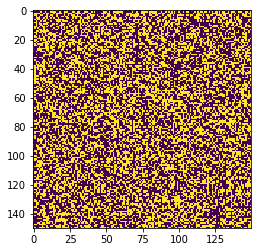

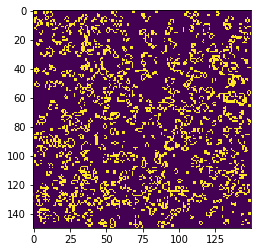

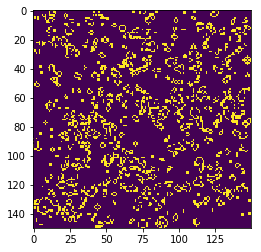

In [423]:
# la simulation est représentée par les couches succesives tu tableau
plt.imshow(simul[:, :, 0])  # temps 0
plt.show()
plt.imshow(simul[:, :, 15])  # temps 15
plt.show()
plt.imshow(simul[:, :, 30])  # temps 30
plt.show()

/Users/jeremie.cabessau-paris2.fr/Library/Python/3.7/lib/python/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


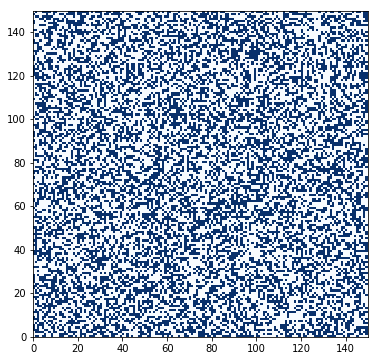

In [424]:
# On crée l'animation de notre simulation
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

# figure
fig, ax = plt.subplots(figsize = (6, 6))
ax.set(xlim = (0, taille), ylim = (0, taille))

# first image
x = np.linspace(0, taille, taille + 1)
y = np.linspace(0, taille, taille + 1)
image = ax.pcolormesh(x, y, simul[:, :, 0], vmin = 0, vmax = 1, cmap = "Blues")
#fig.colorbar(image)

# update function
def animate(t):
    image.set_array(simul[:, :, t].flatten())

# show animation
anim = FuncAnimation(fig, animate, interval = 75, frames = temps)
HTML(anim.to_html5_video())